In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 5070 Ti Laptop GPU (UUID: GPU-6c7ec0d6-4306-1156-ccee-4f26d00c9bfd)


In [2]:
import tensorflow as tf 
import tensorflow.keras as keras 
import pandas as pd 
import numpy as np 
import helpers as helpers

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [5]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df.text[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [7]:
# Shuffle train_df 
train_df_shuffled = train_df.sample(frac=1, random_state=42)

In [8]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
len(train_df_shuffled), len(test_df)

(7613, 3263)

In [10]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
import random 

rand_idx = random.sample(range(len(train_df_shuffled)), 10) 
rand_idx

[1263, 2242, 2740, 297, 5166, 1749, 1781, 2762, 7225, 345]

In [12]:
for idx in rand_idx: 
    text = train_df_shuffled.text[idx] 
    label = "Disaster" if train_df_shuffled.target[idx] > 0 else "Not Disaster"

    print(f"Text : {text}\
            \nLabel : {label}\n=========================================================")

Text : I HATE WHEN IM TRYING TO STRAIGHTEN MY HAIR AND MY BROTHER COMES SWOOPING IN BEHIND ME AND SCARES ME I JUST BURNED MY FINGER            
Label : Not Disaster
Text : Anyone else getting tons of telemarketing calls on their cell phone? I've been deluged!            
Label : Not Disaster
Text : devastated by today's allegations.            
Label : Not Disaster
Text : RT: Geek_Apocalypse: 4pm GMT :Hesse plays dark souls 2 day 9: http://t.co/TnGPsHNL87 http://t.co/imzLNZLtF5 #etcPB            
Label : Not Disaster
Text : Time to obliterate this sin!            
Label : Not Disaster
Text : 2 dead 2 injured in head-on collision on Kenai Spur Highway http://t.co/hbbGY2vZYt            
Label : Disaster
Text : Just bought another @meinlcymbals 18' medium crash!! Hey @meinlcymbals what about an endorsement! Starting to get expensive!            
Label : Not Disaster
Text : 70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http

In [13]:
from sklearn.model_selection import train_test_split 

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled.text, 
                                                                           train_df_shuffled.target, 
                                                                           test_size=0.1, 
                                                                           random_state=42) 
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
# Text Vectorization 

from tensorflow.keras.layers import TextVectorization 

text_vectorizor = TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False
)

In [15]:
train_sentences[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [16]:
len(train_sentences[0].split())

13

In [17]:
round(sum(len(i.split()) for i in train_sentences) / len(train_sentences))

15

In [18]:
max_vocab_length = 10000
max_length = round(sum(len(i.split()) for i in train_sentences) / len(train_sentences))

text_vectorizor = TextVectorization(
    max_tokens=max_vocab_length, 
    output_mode='int', 
    output_sequence_length=max_length
)

In [19]:
text_vectorizor.adapt(train_sentences)

In [20]:
sample_sentence = "Where are you from bro!!" 
text_vectorizor([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 221,   22,   12,   20, 1709,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [21]:
import random 

def vectorize_random_sentence(vectorizer, sentences): 
    sentence = random.choice(sentences)
    print(sentence)
    print(vectorizer([sentence]))    

In [23]:
vectorize_random_sentence(text_vectorizor, train_sentences)

#fitness Knee Damage Solution http://t.co/pUMbrNeBJE
tf.Tensor(
[[3844 2072  233 2290    1    0    0    0    0    0    0    0    0    0
     0]], shape=(1, 15), dtype=int64)


In [24]:
distinct_words = text_vectorizor.get_vocabulary()
top_5_words = distinct_words[:5] 
bottom_5_words = distinct_words[-5:] 

print(f"Number of words : {len(distinct_words)}")
print(f"Most common words : {top_5_words}") 
print(f"Least common words : {bottom_5_words}")

Number of words : 10000
Most common words : ['', '[UNK]', 'the', 'a', 'in']
Least common words : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [25]:
## Create Embeddings 

from tensorflow.keras.layers import Embedding 

embedding = Embedding(
    input_dim=10000,
    output_dim=128,
    embeddings_initializer='uniform',
    mask_zero=False,
    input_length=max_length,
)

In [26]:
rand_sentence = random.choice(train_sentences) 
vectorized_sentence = text_vectorizor([rand_sentence]) 
embedded_sentence = embedding(vectorized_sentence)
# embedding()[train_sentences[0]]

In [27]:
rand_sentence, vectorized_sentence, embedded_sentence

('Remembering Pittsburgh Eyewitness History of Steel City by Len Barcousky PB Penn http://t.co/dhGAVw8bSW http://t.co/0lMhEAEX9k',
 <tf.Tensor: shape=(1, 15), dtype=int64, numpy=
 array([[2006, 9757,  654,  705,    6, 1967,  182,   18, 3680,    1, 9895,
         4940,    1,    1,    0]])>,
 <tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.04856278,  0.03877563,  0.0122097 , ..., -0.00715332,
          -0.00486095, -0.04178194],
         [ 0.00140373, -0.00521773,  0.01210315, ..., -0.00011698,
          -0.01358193,  0.03023765],
         [ 0.04308457,  0.02336034,  0.00714235, ...,  0.02190485,
           0.00163736,  0.02193922],
         ...,
         [ 0.00542838,  0.0164043 ,  0.03861537, ...,  0.04504878,
          -0.00484606,  0.04540044],
         [ 0.00542838,  0.0164043 ,  0.03861537, ...,  0.04504878,
          -0.00484606,  0.04540044],
         [-0.02753041, -0.03963895, -0.00554495, ..., -0.02718309,
          -0.01381386,  0.01225625]]], dtype=float32)

In [28]:
vectorized_sentence.shape, embedded_sentence.shape

(TensorShape([1, 15]), TensorShape([1, 15, 128]))

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score,precision_recall_fscore_support 
import seaborn as sns
import matplotlib.pyplot as plt
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()), # Converts words to numbers using tfidf 
    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

model_0.score(val_sentences, val_labels)

0.7926509186351706

In [30]:
model_0.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())],
 'verbose': False,
 'tfidf': TfidfVectorizer(),
 'clf': MultinomialNB(),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'clf__alpha': 1.0,
 'clf__class_prior': None,
 'clf__fit_prior': True,
 'clf__force_alpha': True}

In [31]:
model_0_preds = model_0.predict(val_sentences)
model_0_preds[:5]

array([1, 1, 1, 0, 0])

In [32]:
def calculate_model_metrics(y_true, y_pred): 
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, 
                                                                                       y_pred, 
                                                                                      average='weighted')

    return {
        'accuracy': model_accuracy, 
        'precision': model_precision, 
        'recall': model_recall, 
        'f1': model_f1_score
    }

In [33]:
model_0_metrics = calculate_model_metrics(y_true=val_labels, y_pred=model_0_preds)
model_0_metrics

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [34]:
class_names = ["Not Disaster", "Disaster"] 

def create_conf_matrix(y_true, y_pred, class_names): 
    conf_matrix = confusion_matrix(y_true, y_pred) 
    sns.heatmap(
        conf_matrix, 
        annot=True, 
        fmt='d', 
        cmap='Blues', 
        xticklabels=class_names, 
        yticklabels=class_names
    )

    plt.xlabel("Predicted") 
    plt.ylabel("Actual") 
    plt.title("Confusion Matrix") 
    plt.show()

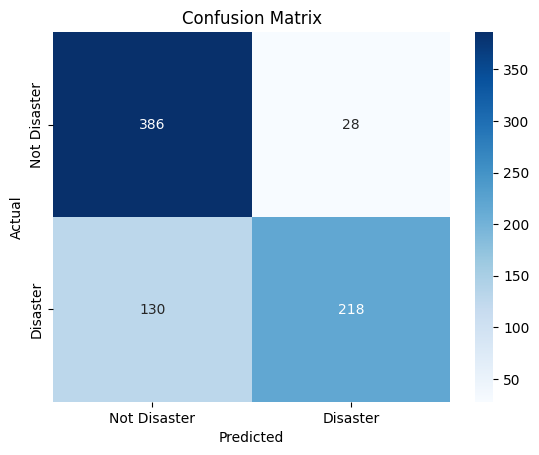

In [35]:
create_conf_matrix(y_true=val_labels, 
                  y_pred=model_0_preds, 
                  class_names=class_names)

In [36]:
# Model-1 Feed Forward NN (Dense Model)

from tensorflow.keras import layers 
from tensorflow import keras 

inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizor(inputs) 
embedded = embedding(text_vectors) 
x = layers.GlobalAveragePooling1D(name="global_average_pooling_1d")(embedded) 
outputs = layers.Dense(1, activation='sigmoid')(x) 
model_1 = keras.Model(inputs, outputs, name="model_1_dense") 
model_1.summary()

model_1.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_1.fit(
    train_sentences, 
    train_labels, 
    validation_data=(val_sentences, val_labels), 
    callbacks=helpers.create_tensorboard_callback(
        dir_name="/workspace/tensorflow/tensorboard/", 
        experiment_name="model_1_nlp_dense"
    ), 
    epochs=5, 
    verbose=1
)

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling_1d   (None, 128)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [37]:
model_1_pred_probas = model_1.predict(val_sentences) 
model_1_preds = tf.squeeze(tf.round(model_1_pred_probas)) 
model_1_preds[:5]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [38]:
model_1_metrics = calculate_model_metrics(y_true=val_labels, 
                                         y_pred=model_1_preds)
model_1_metrics

{'accuracy': 0.7795275590551181,
 'precision': 0.7816545659065345,
 'recall': 0.7795275590551181,
 'f1': 0.7774022539420015}

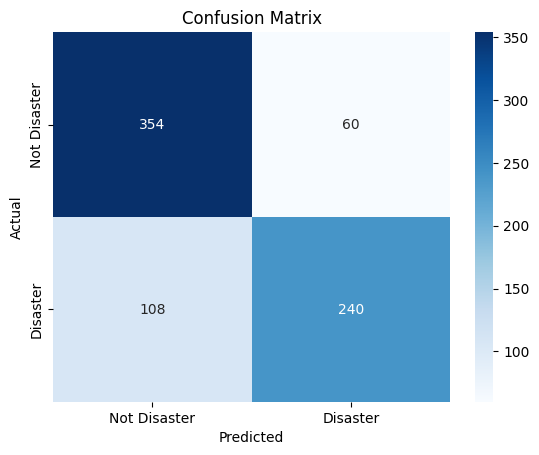

In [39]:
create_conf_matrix(y_true=val_labels, 
                  y_pred=model_1_preds, 
                  class_names=class_names)

In [40]:
# Expriment-3 Recurrent Neural Networks 

inputs = layers.Input(shape=(1,), dtype=tf.string) 
text_vectors = layers.TextVectorization(max_tokens=10000, 
                                       standardize="lower_and_strip_punctuation", 
                                       split="whitespace", 
                                       output_mode="int", 
                                       output_sequence_length=15, 
                                       name='text_vectorization')(inputs) 

embedding = layers.Embedding(input_dim=10000,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length, 
                             name="embedding_layer")(text_vectors)

x = layers.LSTM(
    64,
    return_sequences=True,
    activation='tanh',
    recurrent_activation='sigmoid',
    recurrent_dropout=0.1
)(embedding)

print(x.shape) 

x = layers.LSTM(
    64,
    activation='tanh',
    recurrent_activation='sigmoid',
    recurrent_dropout=0.1
)(x)

print(x.shape) 

x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x) 

model_2 = keras.Model(inputs, outputs, name='model_2_recurrent_rnn_lstm')

model_2.summary()

model_2.layers[1].adapt(train_sentences)

model_2.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_2.fit(
    train_sentences, 
    train_labels, 
    validation_data=(val_sentences, val_labels), 
    callbacks=[
        helpers.create_tensorboard_callback(
            dir_name="/workspace/tensorflow/tensorboard/", 
            experiment_name="model_2_rnn_lstm"
        )
    ], 
    epochs=5
)

(None, 15, 64)
(None, 64)
Model: "model_2_recurrent_rnn_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding_layer (Embedding  (None, 15, 128)           1280000   
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dens

In [41]:
model_2_pred_probas = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probas)) 
model_2_preds[:5]

24/24 [==============================] - 1s 16ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [42]:
model_2_metrics = calculate_model_metrics(y_true=val_labels, 
                                         y_pred=model_2_preds)
model_2_metrics

{'accuracy': 0.7506561679790026,
 'precision': 0.7533297744561591,
 'recall': 0.7506561679790026,
 'f1': 0.7474837243949061}

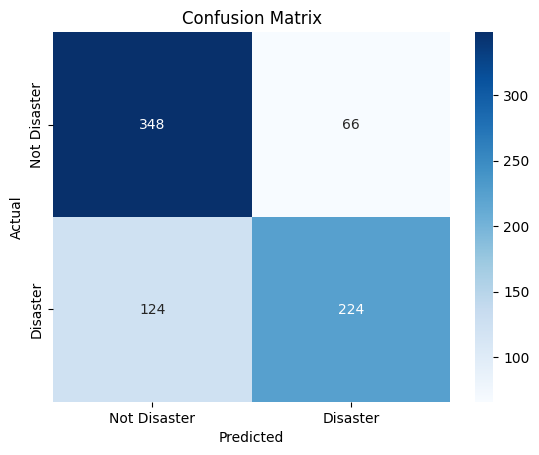

In [43]:
create_conf_matrix(y_true=val_labels, 
                  y_pred=model_2_preds, 
                  class_names=class_names)

In [44]:
# Experimen-3 RNN GRU Model 

inputs = layers.Input(shape=(1,), dtype=tf.string) 
text_vectors = layers.TextVectorization(max_tokens=10000,
                                        standardize='lower_and_strip_punctuation',
                                        split='whitespace',
                                        ngrams=None,
                                        output_mode='int',
                                        output_sequence_length=15,
                                        name="text_vectorization_layer")(inputs) 

embedding = layers.Embedding(input_dim=10000,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length, 
                             name="embedding_layer")(text_vectors) 

x = layers.GRU(units=64, 
              activation='tanh', 
              return_sequences=True, 
              recurrent_activation='sigmoid', 
              recurrent_dropout=0.1)(embedding) 

x = layers.GRU(64, 
               activation='tanh', 
               return_sequences=False,
               recurrent_activation='sigmoid', 
               recurrent_dropout=0.1)(x) 

outputs = layers.Dense(1, activation='sigmoid')(x) 

model_3 = keras.Model(inputs, outputs, name="model_3_rnn_gru") 
model_3.summary()

model_3.layers[1].adapt(train_sentences) 

model_3.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_3.fit(
    train_sentences, 
    train_labels, 
    validation_data=(val_sentences, val_labels), 
    callbacks=[
        helpers.create_tensorboard_callback(
            dir_name="/workspace/tensorflow/tensorboard/", 
            experiment_name="model_3_rnn_lstm"
        )
    ], 
    epochs=5
)

Model: "model_3_rnn_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_layer (  (None, 15)                0         
 TextVectorization)                                              
                                                                 
 embedding_layer (Embedding  (None, 15, 128)           1280000   
 )                                                               
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 1)             

In [45]:
model_3_pred_probas = model_3.predict(val_sentences) 
model_3_preds = tf.squeeze(tf.round(model_3_pred_probas))
model_3_preds[:5]

24/24 [==============================] - 1s 12ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [46]:
model_3_metrics = calculate_model_metrics(y_true=val_labels, 
                                          y_pred=model_3_preds)
model_3_metrics

{'accuracy': 0.7559055118110236,
 'precision': 0.7557293707913207,
 'recall': 0.7559055118110236,
 'f1': 0.7547819586377322}

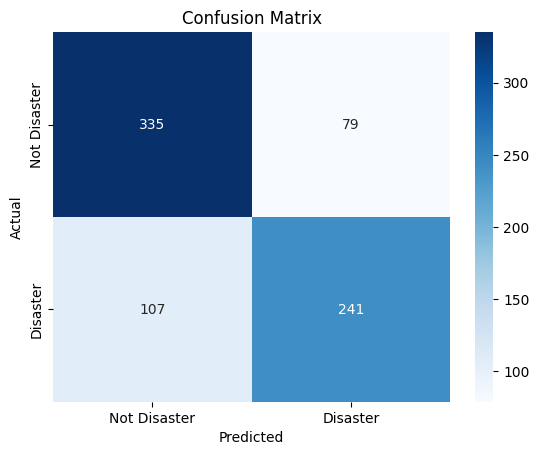

In [47]:
create_conf_matrix(y_true=val_labels, 
                  y_pred=model_3_preds, 
                  class_names=class_names)

In [48]:
# Model-4 Bidirectional RNN With LSTM 

inputs = layers.Input(shape=(1,), dtype=tf.string) 
text_vectors = layers.TextVectorization(max_tokens=10000,
                                        standardize='lower_and_strip_punctuation',
                                        split='whitespace',
                                        ngrams=None,
                                        output_mode='int',
                                        output_sequence_length=15,
                                        pad_to_max_tokens=False,
                                        name="text_vectorization_layer")(inputs) 

embedding = layers.Embedding(input_dim=10000,
                            output_dim=128,
                            embeddings_initializer='uniform',
                            embeddings_regularizer=None,
                            activity_regularizer=None,
                            embeddings_constraint=None,
                            mask_zero=False,
                            input_length=15,
                            name="embedding_layer")(text_vectors) 

x = layers.Bidirectional(layer=layers.LSTM(64, 
                                           return_sequences=True, 
                                           activation='tanh', 
                                           recurrent_activation='sigmoid', 
                                           recurrent_dropout=0.1))(embedding) 

x = layers.Bidirectional(layer=layers.GRU(64, 
                                         return_sequences=False, 
                                         activation="tanh", 
                                         recurrent_activation="sigmoid", 
                                         recurrent_dropout=0.1))(x) 

outputs = layers.Dense(1, activation='sigmoid')(x) 

model_4 = keras.Model(inputs, outputs, name="model_4_rnn_bidirectional") 
model_4.summary()


model_4.layers[1].adapt(train_sentences) 

model_4.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_4.fit(
    train_sentences, 
    train_labels, 
    validation_data=(val_sentences, val_labels), 
    callbacks=[
        helpers.create_tensorboard_callback(
            dir_name="/workspace/tensorflow/tensorboard/", 
            experiment_name="model_4_rnn_bidirectional"
        )
    ], 
    epochs=5
)

Model: "model_4_rnn_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_layer (  (None, 15)                0         
 TextVectorization)                                              
                                                                 
 embedding_layer (Embedding  (None, 15, 128)           1280000   
 )                                                               
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                   

In [49]:
model_4_pred_probas = model_4.predict(val_sentences)
model_4_preds = tf.squeeze(tf.round(model_4_pred_probas)) 
model_4_preds[:5]

24/24 [==============================] - 1s 20ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [50]:
model_4_metrics = calculate_model_metrics(y_true=val_labels, 
                                         y_pred=model_4_preds)
model_4_metrics

{'accuracy': 0.7559055118110236,
 'precision': 0.7557293707913207,
 'recall': 0.7559055118110236,
 'f1': 0.7547819586377322}

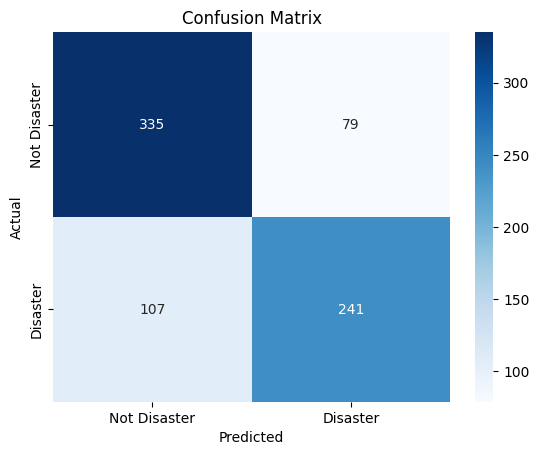

In [51]:
create_conf_matrix(y_true=val_labels, y_pred=model_4_preds, class_names=class_names)

In [52]:
## Experiment 6- model_5 Conv NN 

# Model-5 CNN 

inputs = layers.Input(shape=(1,), dtype=tf.string) 
text_vectors = layers.TextVectorization(max_tokens=10000,
                                        standardize='lower_and_strip_punctuation',
                                        split='whitespace',
                                        ngrams=None,
                                        output_mode='int',
                                        output_sequence_length=15,
                                        pad_to_max_tokens=False,
                                        name="text_vectorization_layer")(inputs) 

embedding = layers.Embedding(input_dim=10000,
                            output_dim=128,
                            embeddings_initializer='uniform',
                            embeddings_regularizer=None,
                            activity_regularizer=None,
                            embeddings_constraint=None,
                            mask_zero=False,
                            input_length=15,
                            name="embedding_layer")(text_vectors) 

x = layers.Conv1D(filters=32,
                  kernel_size=5,
                  strides=1,
                  padding='valid')(embedding)

x = layers.MaxPooling1D(pool_size=2,
                        strides=None,
                        padding='valid')(x)

x = layers.GlobalAveragePooling1D(name="global_average_pooling_1d")(x)

outputs = layers.Dense(1, activation='sigmoid')(x) 

model_5 = keras.Model(inputs, outputs, name="model_5_cnn") 
model_5.summary()


model_5.layers[1].adapt(train_sentences) 

model_5.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_5.fit(
    train_sentences, 
    train_labels, 
    validation_data=(val_sentences, val_labels), 
    callbacks=[
        helpers.create_tensorboard_callback(
            dir_name="/workspace/tensorflow/tensorboard/", 
            experiment_name="model_5_cnn"
        )
    ], 
    epochs=5
)

Model: "model_5_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_layer (  (None, 15)                0         
 TextVectorization)                                              
                                                                 
 embedding_layer (Embedding  (None, 15, 128)           1280000   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                       

In [53]:
model_5_pred_probas = model_5.predict(val_sentences) 
model_5_preds = tf.squeeze(tf.round(model_5_pred_probas))
model_5_preds[:5]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [54]:
model_5_metrics = calculate_model_metrics(y_true=val_labels, 
                                         y_pred=model_5_preds)
model_5_metrics

{'accuracy': 0.7572178477690289,
 'precision': 0.7573294948869645,
 'recall': 0.7572178477690289,
 'f1': 0.7558283776496816}

In [56]:
!pip install tensorflow_hub 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.1 MB/s  0:00:00eta 0:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.20.0
    Uninstalling tensorboard-2.20.0:
      Successfully uninstalled tensorboard-2.20.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [tensorflow_hub]


In [67]:
# Universal Sentence Encoder 

from absl import logging 
import tensorflow_hub as hub 
import os 
import re 

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
embed = hub.load(module_url) 
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [66]:
embedded_sample = embed([train_sentences[0]])
embedded_sample.shape

TensorShape([1, 512])

In [106]:
## Experiment 6- model_5 Conv NN 

# Model-5 CNN 

# class EmbedLayer(layers.Layer):
#     def __init__(self, **kwargs):
#         super().__init__(**kwargs)
#         self.embed_fn = embed

#     def call(self, inputs):
#         inputs = tf.squeeze(inputs, axis=-1)  # (batch, 1) -> (batch,)
#         x = self.embed_fn(inputs)             # (batch, 512)
#         return tf.expand_dims(x, axis=1)      # (batch, 1, 512) for LSTM

sentence_encoder_layer = hub.KerasLayer(module_url, 
                                       input_shape=[], 
                                       dtype=tf.string, 
                                       trainable=False, 
                                       name="USE")

# Rest of model unchanged
inputs = keras.Input(shape=(), dtype=tf.string)
x = sentence_encoder_layer(inputs)
# x = layers.LSTM(64,
#                activation='tanh', 
#                recurrent_activation='sigmoid', 
#                recurrent_dropout=0.1)(x)  # Now gets (batch, 1, 512)

x = layers.Dense(128,
               activation='relu')(x)

x = layers.Dense(128,
               activation='relu')(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model_6 = keras.Model(inputs, outputs, name="model_6_use_embeddings")
model_6.summary()


model_6.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_6.fit(
    train_sentences, 
    train_labels, 
    validation_data=(val_sentences, val_labels), 
    callbacks=[
        helpers.create_tensorboard_callback(
            dir_name="/workspace/tensorflow/tensorboard/", 
            experiment_name="model_6_use_embedding"
        )
    ], 
    epochs=4
)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run Identity: Dst tensor is not initialized. [Op:Identity] name: 

In [95]:
model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 18ms/step - loss: 0.4546 - accuracy: 0.8150


[0.4545666575431824, 0.8149606585502625]

In [96]:
model_6_pred_probas = model_6.predict(val_sentences) 
model_6_preds = tf.squeeze(tf.round(model_6_pred_probas)) 
model_6_preds[:5]

24/24 [==============================] - 1s 15ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [97]:
model_6_metrics = calculate_model_metrics(y_true=val_labels, 
                       y_pred=model_6_preds)
model_6_metrics

{'accuracy': 0.8149606299212598,
 'precision': 0.8223942551568857,
 'recall': 0.8149606299212598,
 'f1': 0.8120316465624272}

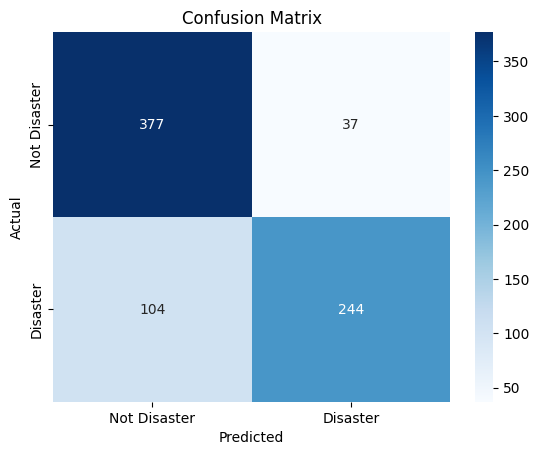

In [98]:
create_conf_matrix(y_true=val_labels, 
                  y_pred=model_6_preds, 
                  class_names=class_names)